In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ruptures as rpt
import requests
import seaborn as sns
import folium
import dash
import tensorflow
import plotly
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression

print('All libraries install successfully!')

All libraries install successfully!


In [28]:
file = '/Users/samuel/Documents/University/Masters/Modules/SEM2/Cities and Climate Change/dengue_fever_dhaka.csv'

In [29]:
data1 = pd.read_csv(file)

In [30]:
data1.head(13)

,Month,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Cases,Percentage Cases
0,January,0,0,0,0,0,6,15,0,13,92,26,38,199,32,126,547,0.25
1,February,0,0,0,0,0,7,7,0,3,58,7,18,45,9,20,174,0.08
2,March,0,0,0,0,0,3,2,2,17,36,19,17,27,13,20,156,0.07
3,April,0,0,0,0,0,3,0,6,38,73,29,58,25,3,23,258,0.12
4,May,0,1,0,0,0,12,8,10,70,134,52,193,10,43,163,696,0.32
5,June,0,0,0,61,10,50,9,28,254,267,295,1884,20,272,737,3887,1.76
6,July,160,4,61,255,129,172,82,171,926,286,946,"16,253",23,2286,1571,"23,325",10.57
7,August,473,125,183,691,122,339,80,765,1451,346,1796,"52,636",68,7698,3521,"70,294",31.87
8,September,334,188,120,193,246,385,76,965,1544,430,3087,"16,856",47,7841,9911,"42,223",19.14
9,October,184,154,45,114,107,501,63,869,1077,512,2406,8143,164,5458,"21,932","41,729",18.92


In [31]:
data1.dtypes

Month                object
2008                  int64
2009                  int64
2010                  int64
2011                  int64
2012                  int64
2013                  int64
2014                  int64
2015                  int64
2016                  int64
2017                  int64
2018                 object
2019                 object
2020                  int64
2021                 object
2022                 object
Cases                object
Percentage Cases    float64
dtype: object

In [32]:
data1['2018'] = data1['2018'].str.replace(',', '').astype(int)
data1['2019'] = data1['2019'].str.replace(',', '').astype(int)
data1['2021'] = data1['2021'].str.replace(',', '').astype(int)
data1['2022'] = data1['2022'].str.replace(',', '').astype(int)

In [33]:
data1.dtypes

Month                object
2008                  int64
2009                  int64
2010                  int64
2011                  int64
2012                  int64
2013                  int64
2014                  int64
2015                  int64
2016                  int64
2017                  int64
2018                  int64
2019                  int64
2020                  int64
2021                  int64
2022                  int64
Cases                object
Percentage Cases    float64
dtype: object

In [34]:
data1 = data1.drop(columns=['Cases'])
data1.head(14)

,Month,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Percentage Cases
0,January,0,0,0,0,0,6,15,0,13,92,26,38,199,32,126,0.25
1,February,0,0,0,0,0,7,7,0,3,58,7,18,45,9,20,0.08
2,March,0,0,0,0,0,3,2,2,17,36,19,17,27,13,20,0.07
3,April,0,0,0,0,0,3,0,6,38,73,29,58,25,3,23,0.12
4,May,0,1,0,0,0,12,8,10,70,134,52,193,10,43,163,0.32
5,June,0,0,0,61,10,50,9,28,254,267,295,1884,20,272,737,1.76
6,July,160,4,61,255,129,172,82,171,926,286,946,16253,23,2286,1571,10.57
7,August,473,125,183,691,122,339,80,765,1451,346,1796,52636,68,7698,3521,31.87
8,September,334,188,120,193,246,385,76,965,1544,430,3087,16856,47,7841,9911,19.14
9,October,184,154,45,114,107,501,63,869,1077,512,2406,8143,164,5458,21932,18.92


In [35]:
data1 = data1.drop(columns=['Percentage Cases'])
data1.head(14)

,Month,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,January,0,0,0,0,0,6,15,0,13,92,26,38,199,32,126
1,February,0,0,0,0,0,7,7,0,3,58,7,18,45,9,20
2,March,0,0,0,0,0,3,2,2,17,36,19,17,27,13,20
3,April,0,0,0,0,0,3,0,6,38,73,29,58,25,3,23
4,May,0,1,0,0,0,12,8,10,70,134,52,193,10,43,163
5,June,0,0,0,61,10,50,9,28,254,267,295,1884,20,272,737
6,July,160,4,61,255,129,172,82,171,926,286,946,16253,23,2286,1571
7,August,473,125,183,691,122,339,80,765,1451,346,1796,52636,68,7698,3521
8,September,334,188,120,193,246,385,76,965,1544,430,3087,16856,47,7841,9911
9,October,184,154,45,114,107,501,63,869,1077,512,2406,8143,164,5458,21932


In [37]:
data1 = data1.drop(12)
data1.head(14)

,Month,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,January,0,0,0,0,0,6,15,0,13,92,26,38,199,32,126
1,February,0,0,0,0,0,7,7,0,3,58,7,18,45,9,20
2,March,0,0,0,0,0,3,2,2,17,36,19,17,27,13,20
3,April,0,0,0,0,0,3,0,6,38,73,29,58,25,3,23
4,May,0,1,0,0,0,12,8,10,70,134,52,193,10,43,163
5,June,0,0,0,61,10,50,9,28,254,267,295,1884,20,272,737
6,July,160,4,61,255,129,172,82,171,926,286,946,16253,23,2286,1571
7,August,473,125,183,691,122,339,80,765,1451,346,1796,52636,68,7698,3521
8,September,334,188,120,193,246,385,76,965,1544,430,3087,16856,47,7841,9911
9,October,184,154,45,114,107,501,63,869,1077,512,2406,8143,164,5458,21932


In [53]:
dhk_df = data1
dhk_df.head(14)

,Month,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,January,0,0,0,0,0,6,15,0,13,92,26,38,199,32,126
1,February,0,0,0,0,0,7,7,0,3,58,7,18,45,9,20
2,March,0,0,0,0,0,3,2,2,17,36,19,17,27,13,20
3,April,0,0,0,0,0,3,0,6,38,73,29,58,25,3,23
4,May,0,1,0,0,0,12,8,10,70,134,52,193,10,43,163
5,June,0,0,0,61,10,50,9,28,254,267,295,1884,20,272,737
6,July,160,4,61,255,129,172,82,171,926,286,946,16253,23,2286,1571
7,August,473,125,183,691,122,339,80,765,1451,346,1796,52636,68,7698,3521
8,September,334,188,120,193,246,385,76,965,1544,430,3087,16856,47,7841,9911
9,October,184,154,45,114,107,501,63,869,1077,512,2406,8143,164,5458,21932


In [54]:
dhk_df.dtypes

Month    object
2008      int64
2009      int64
2010      int64
2011      int64
2012      int64
2013      int64
2014      int64
2015      int64
2016      int64
2017      int64
2018      int64
2019      int64
2020      int64
2021      int64
2022      int64
dtype: object

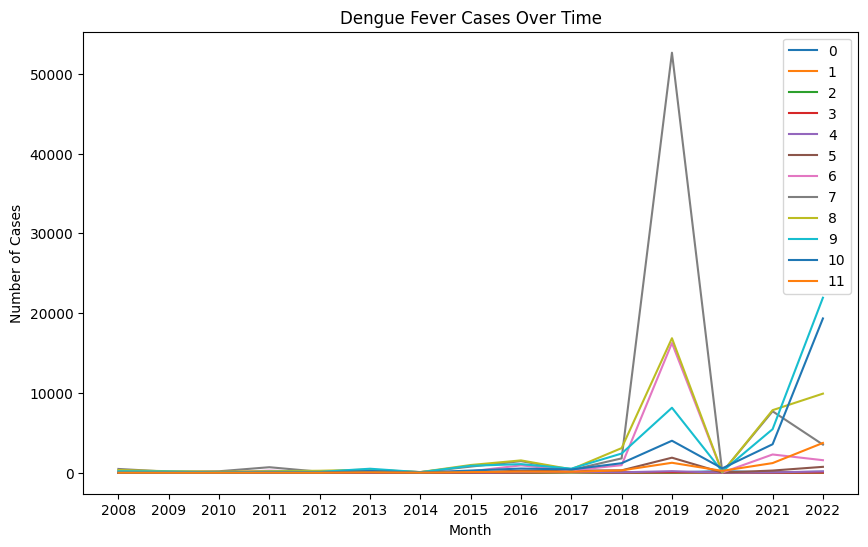

In [52]:
# normal plot
plt.figure(figsize=(10, 6))
for year in dhk_df.columns:
    plt.plot(dhk_df.index, dhk_df[year], label=year)
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.title('Dengue Fever Cases Over Time')
plt.legend()
plt.show()

In [ ]:
Seasonal Decomposition Plot
Box Plot by Month
Polar Plot

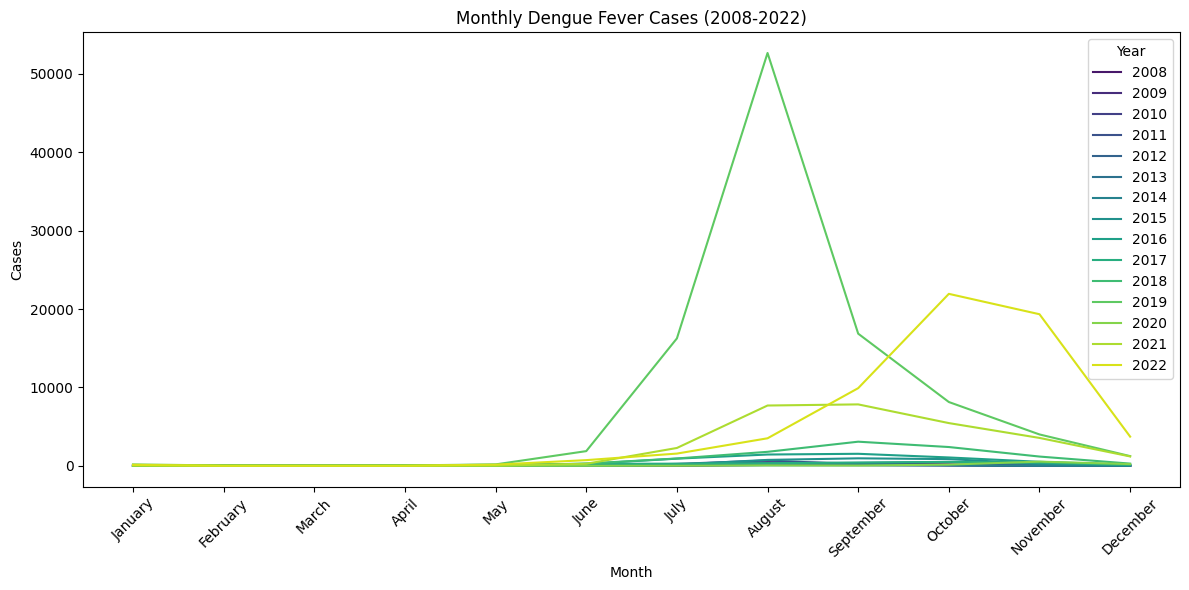

In [55]:
dhk_df_long = pd.melt(dhk_df, id_vars=['Month'], var_name='Year', value_name='Cases')

# Plot the seasonal decomposition
plt.figure(figsize=(12, 6))
sns.lineplot(data=dhk_df_long, x='Month', y='Cases', hue='Year', palette='viridis')
plt.title('Monthly Dengue Fever Cases (2008-2022)')
plt.xlabel('Month')
plt.ylabel('Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

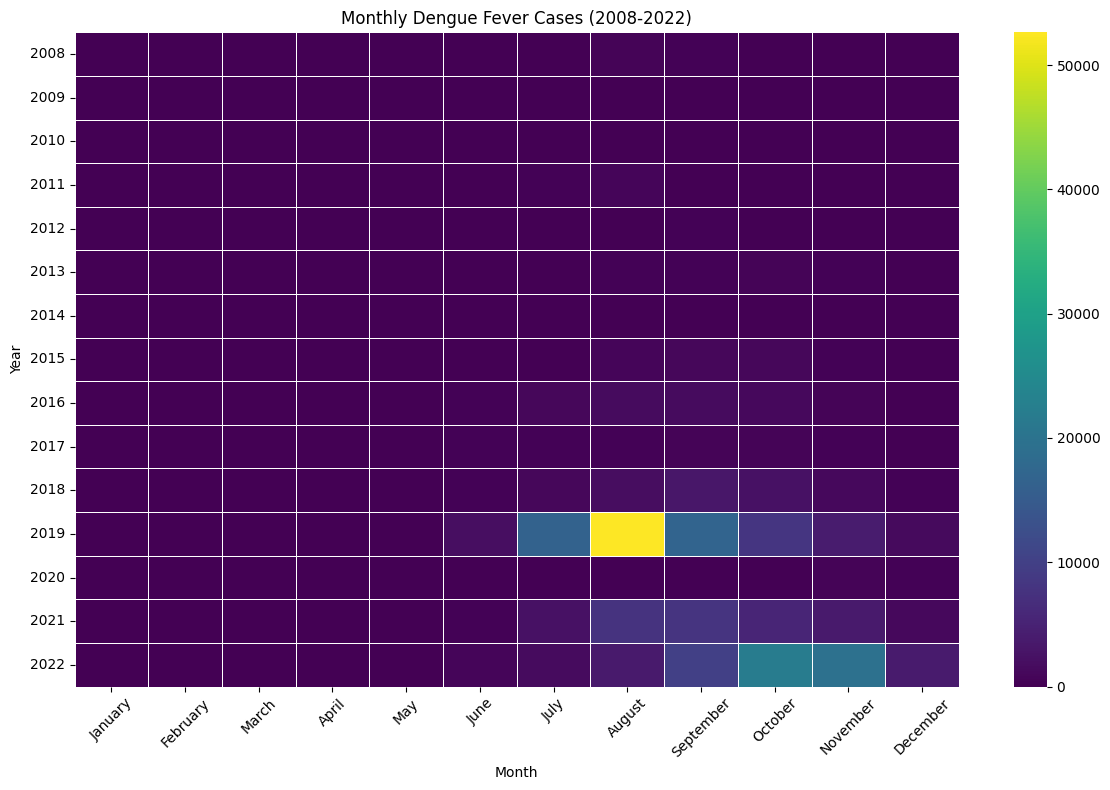

In [56]:
dhk_df_heatmap = dhk_df.set_index('Month').T

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(dhk_df_heatmap, cmap='viridis', linewidths=0.5)
plt.title('Monthly Dengue Fever Cases (2008-2022)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

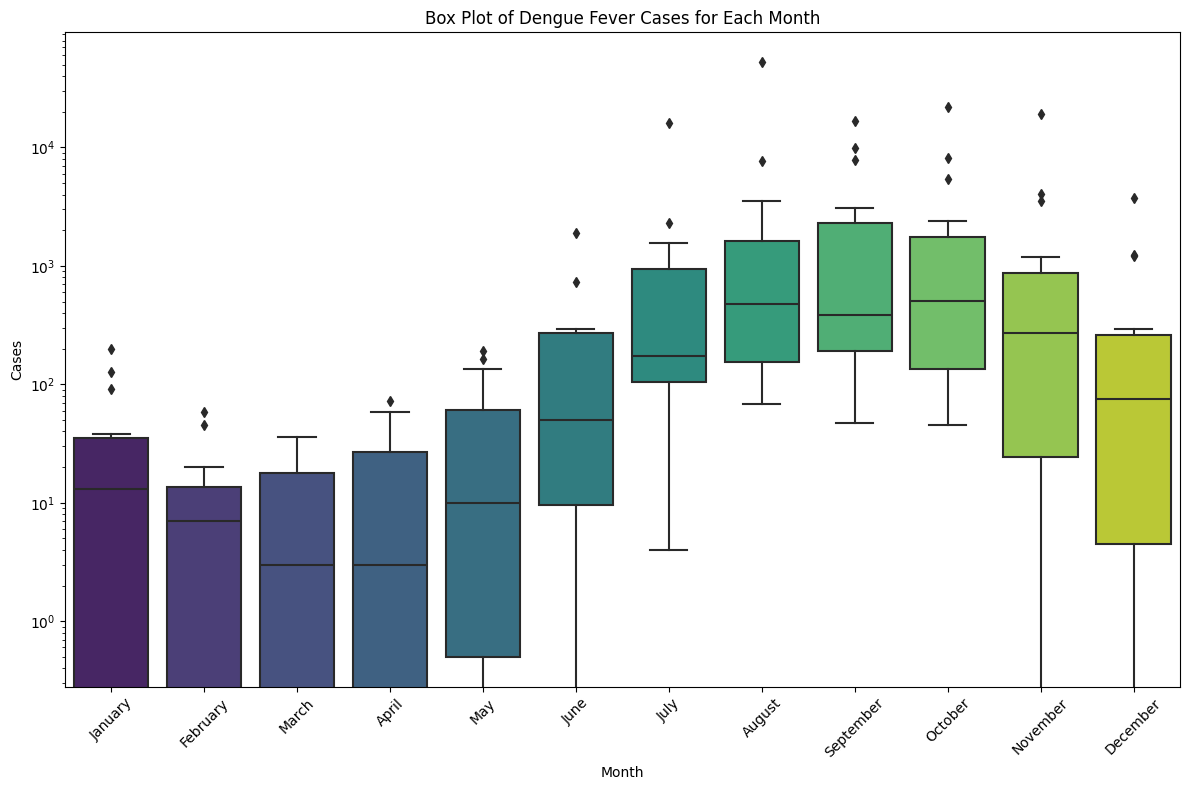

In [58]:
plt.figure(figsize=(12, 8))
dhk_df_long['Month'] = pd.Categorical(dhk_df_long['Month'], categories=[
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
], ordered=True)
sns.boxplot(data=dhk_df_long, x='Month', y='Cases', palette='viridis')
plt.yscale('log')  # Set y-axis scale to logarithmic
plt.title('Box Plot of Dengue Fever Cases for Each Month')
plt.xlabel('Month')
plt.ylabel('Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


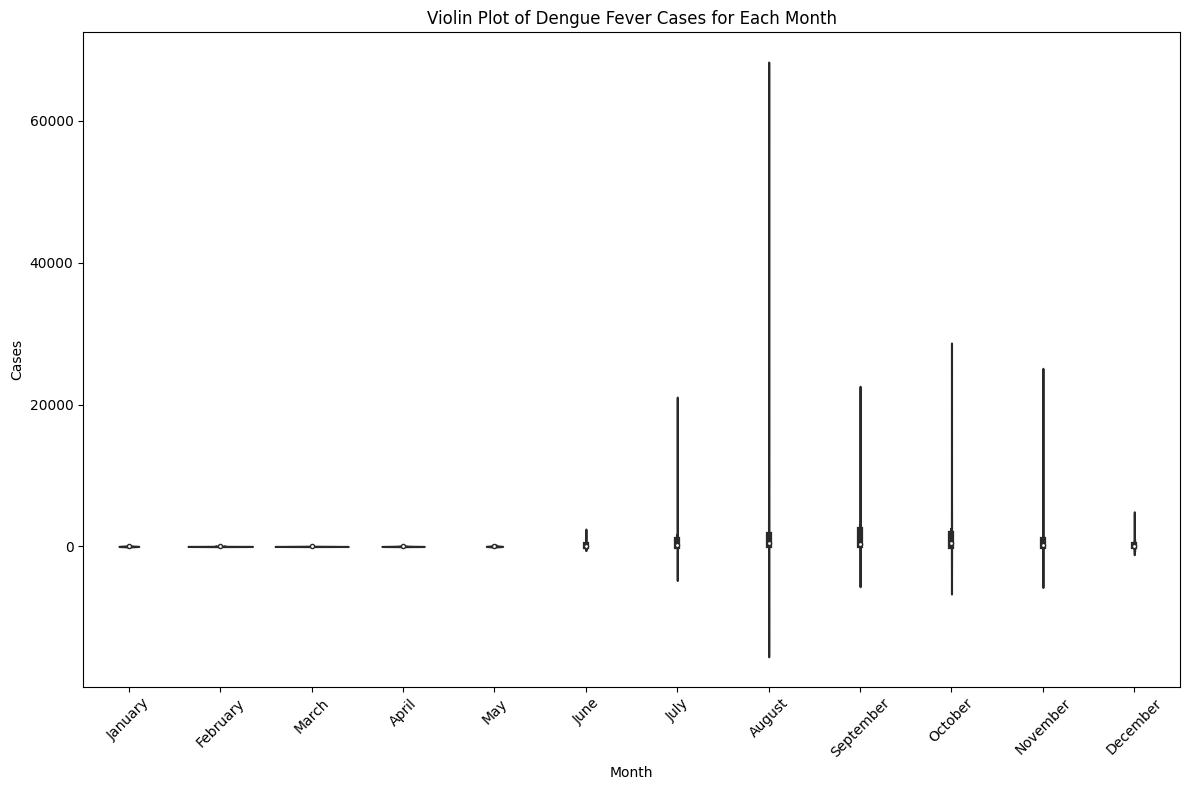

In [62]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=dhk_df_long, x='Month', y='Cases', palette='viridis')
plt.title('Violin Plot of Dengue Fever Cases for Each Month')
plt.xlabel('Month')
plt.ylabel('Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


I am looking to find if there has been any significant change in the start of dengue fever over time due to climate change. Plot a seasonal decomposition plot for my dataframe "dhk_df". The data shows monthly cases for dengue fever from the year 2008 to 2022. I want each month on the x-axis and the number of cases for each year on the y-axis, and plotting the cases per month for each year. I have included my current code below: